In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [ ]:

corpus = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning uses neural networks with many layers.",
    "Natural language processing helps computers understand human language.",
    "Word embeddings represent words as numerical vectors.",
    "Data science combines statistics and computer science.",
    "Artificial intelligence is transforming many industries.",
    "Neural networks are inspired by biological neurons.",
    "Text preprocessing is essential for NLP tasks.",
    "Word2Vec is a popular embedding technique.",
    "Data analysis involves cleaning and exploring datasets."
]

In [ ]:

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    return text.split()  


processed_docs = [preprocess(doc) for doc in corpus]

In [ ]:
model = Word2Vec(
    sentences=processed_docs,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=0
)

In [ ]:
test_words = ['learning', 'data', 'neural']
similar_words = {}

for word in test_words:
    try:
        similar_words[word] = [item[0] for item in model.wv.most_similar(word, topn=5)]
    except KeyError:
        similar_words[word] = ["Word not in vocabulary"]

print("Similar words:")
for word, similars in similar_words.items():
    print(f"{word}: {', '.join(similars)}")

words = list(model.wv.key_to_index.keys())
vectors = np.array([model.wv[word] for word in words]) 

Similar words:
learning: word, technique, text, machine, language
data: embedding, subset, biological, deep, computers
neural: essential, analysis, human, by, networks


In [ ]:

tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=min(30, len(vectors)-1)  
)
vectors_2d = tsne.fit_transform(vectors)

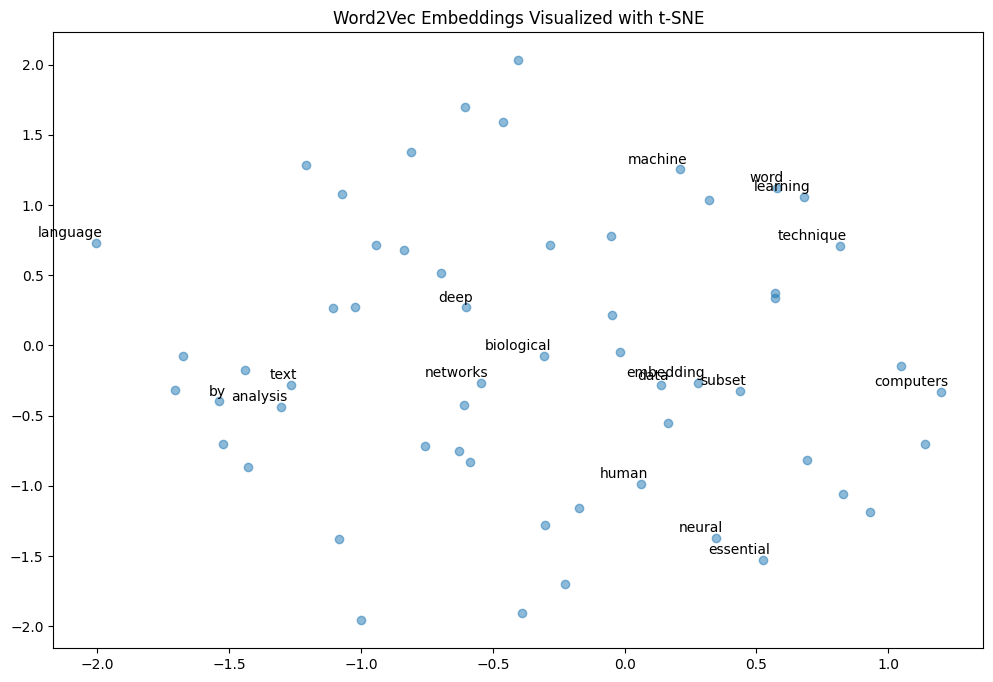

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)

for i, word in enumerate(words):
    if word in test_words or word in sum(similar_words.values(), []):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), 
                    xytext=(5, 2), textcoords='offset points',
                    ha='right', va='bottom')

plt.title('Word2Vec Embeddings Visualized with t-SNE')
plt.show()